<a href="https://colab.research.google.com/github/tussharkas/first-project/blob/main/internshala_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Raw Data:
 Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2024-12-17 14:30:00+00:00  250.770004  250.770004  251.250000  249.789993   
2024-12-17 14:35:00+00:00  251.399994  251.399994  251.549896  250.589996   
2024-12-17 14:40:00+00:00  252.779999  252.779999  252.860397  251.309998   
2024-12-17 14:45:00+00:00  252.570007  252.570007  252.809998  252.250000   
2024-12-17 14:50:00+00:00  252.595001  252.595001  252.979996  252.509995   

Price                            Open   Volume  
Ticker                           AAPL     AAPL  
Datetime                                        
2024-12-17 14:30:00+00:00  250.134995  2105605  
2024-12-17 14:35:00+00:00  250.759995   621725  
2024-12-17 14:40:00+00:00  251.399994  1196193  
2024-12-17 14:45:00+00:00  252.750000   704175  
2024-12-17 14:50:00+00:00  25

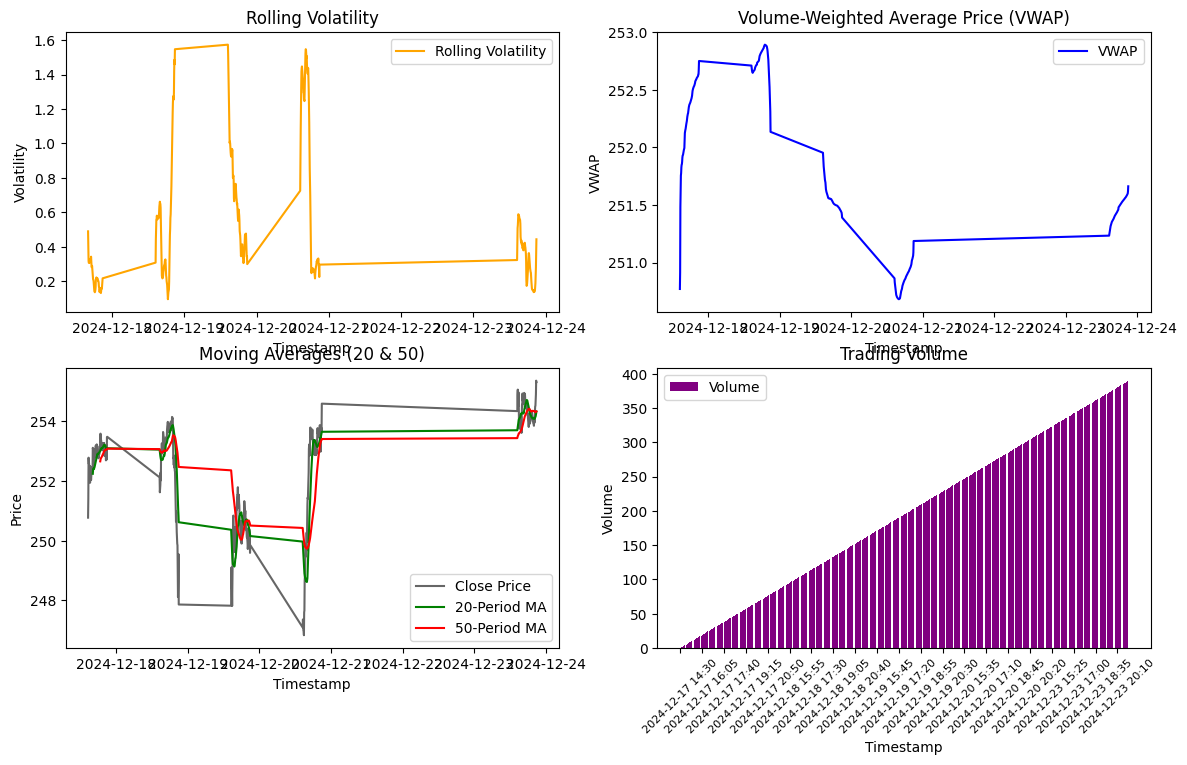

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Download data for the last 5 days (5-min intervals)
ticker = "AAPL"  # Replace with your preferred stock symbol
data = yf.download(tickers=ticker, period="5d", interval="5m")

# Ensure the data is not empty
if data.empty:
    print("No data was downloaded. Please check the ticker symbol or the period.")
else:
    # Display the first few rows of the dataset
    print("Raw Data:\n", data.head())

    # Step 1: Data Cleaning
    # Handle missing values by forward filling
    data = data.ffill()

    # Step 2: Calculate Rolling Volatility
    data['Rolling Volatility'] = data['Close'].rolling(window=20).std()

    # Step 3: Calculate VWAP
    data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

    # Step 4: Calculate Moving Averages (20 and 50 periods)
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()

    # Step 5: Statistical Analysis
    # Calculate standard deviation and skewness
    std_dev = data['Close'].std()
    skewness = skew(data['Close'].dropna())
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness}")

    # Step 6: Visualizations
    plt.figure(figsize=(14, 8))

    # Subplot 1: Rolling Volatility
    plt.subplot(2, 2, 1)
    plt.plot(data['Rolling Volatility'], label='Rolling Volatility', color='orange')
    plt.title('Rolling Volatility')
    plt.xlabel('Timestamp')
    plt.ylabel('Volatility')
    plt.legend()

    # Subplot 2: VWAP
    plt.subplot(2, 2, 2)
    plt.plot(data['VWAP'], label='VWAP', color='blue')
    plt.title('Volume-Weighted Average Price (VWAP)')
    plt.xlabel('Timestamp')
    plt.ylabel('VWAP')
    plt.legend()

    # Subplot 3: Moving Averages
    plt.subplot(2, 2, 3)
    plt.plot(data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data['MA20'], label='20-Period MA', color='green')
    plt.plot(data['MA50'], label='50-Period MA', color='red')
    plt.title('Moving Averages (20 & 50)')
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.legend()

    # Subplot 4: Volume
    plt.subplot(2, 2, 4)

    # Use numeric indices for x-axis
    x = range(len(data))
    y = range(len(data))

    # Plot the bar chart
    plt.bar(x,y, label='Volume', color='purple')
    # Set custom x-axis tick labels at regular intervals
    n = len(data) // 20  # Adjust for roughly 20 ticks
    plt.xticks(x[::n], data.index[::n].strftime('%Y-%m-%d %H:%M'), rotation=45, fontsize=8)

    plt.title('Trading Volume')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()


    # Identify Unusual Patterns
    # For example, spikes in
